In [2]:
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms
import torch
import random

/home/hinton/anaconda3/envs/hyj_pt4al/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform_train = transforms.Compose([
    transforms.Resize([144,144]),
    transforms.RandomCrop([128,128]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [4]:
path = '/home/lecun/NAS_AIlab_dataset/dataset/cifar10/train/cat/house_cat_s_002092.png'
img = cv2.imread(path)
img = Image.fromarray(img)
img = transform_train(img)
c,w,h = img.shape
img1 = img[:,:w//2,:]
img2 = img[:,w//2:,:]
img3 = torch.cat((img2,img1),dim=1)
print(img1.shape)
print(img2.shape)
print(img3.shape)

torch.Size([3, 64, 128])
torch.Size([3, 64, 128])
torch.Size([3, 128, 128])


In [2]:
def softmax(list):
    array = np.array(list)
    exp_a = np.exp(array)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [8]:
def normalize(list):
    MAX = max(list)
    MIN = min(list)
    norm_list = [(x-MIN)/(MAX-MIN) for x in list]
    return norm_list

In [34]:
c_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/classification_loss/test_classification_loss.txt', 'r')
# o_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/orderprediction/orderprediction_loss.txt', 'r')
r_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/rotation/test_rotation_loss.txt', 'r')

c_loss = [float(string.split('//')[0]) for string in c_file.readlines()]
# o_loss = [float(string.split('//')[0]) for string in o_file.readlines()]
r_loss = [float(string.split('//')[0]) for string in r_file.readlines()]

# c_norm = c_loss
# r_norm = r_loss

c_norm = [float(np.log(1+i)) for i in c_loss]
# o_norm = [float(np.log(1+i))/sum(o_loss) for i in o_loss]
r_norm = [float(np.log(1+i)) for i in r_loss]

# c_norm = np.argsort(c_loss)
# # o_norm = np.argsort(o_loss)
# r_norm = np.argsort(r_loss)

# c_norm = c_norm / max(c_norm)
# # o_norm = o_norm / max(o_norm)
# r_norm = r_norm / max(r_norm)

c_norm = normalize(c_norm)
# o_norm = normalize(o_loss)
r_norm = normalize(r_norm)

# print(len(c_norm))
# print(len(o_norm))
# print(len(r_norm))

In [35]:
print(c_norm[:15])
# print(o_norm[:5])
print(r_norm[:15])

[0.0009988386884084747, 0.17456659616341025, 0.017778717124975234, 0.0005568777031468174, 3.9240841515523155e-06, 0.5120622475529872, 0.0014454259912850956, 6.472778877108259e-07, 0.004680742209381572, 0.0022943775571761054, 2.9246405783182396e-05, 1.9822806582620923e-06, 0.18201744168704423, 0.0027984555992776393, 0.29076174635377394]
[0.0003772550828402892, 0.12774142826509652, 0.06762551193174231, 0.002832480741644471, 3.0409690599797146e-06, 0.0013041928240751927, 4.318328420801137e-05, 4.555903409180699e-05, 0.01893071096325144, 0.29631720674144474, 0.34978256263420515, 0.06125286688997606, 0.06173980825295397, 0.012077793751636996, 0.07781765061360539]


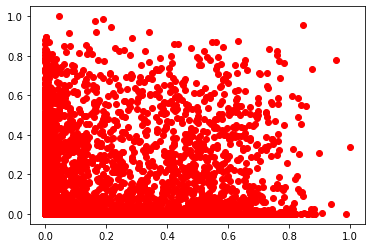

SpearmanrResult(correlation=0.4159526703958116, pvalue=0.0)


In [37]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# plt.plot(c_norm[:15], r_norm[:15], 'ro')
plt.plot(c_norm, r_norm, 'ro')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.show()

# score = spearmanr(c_norm[:1000], r_norm[:1000])
score = spearmanr(c_norm, r_norm)
print(score)

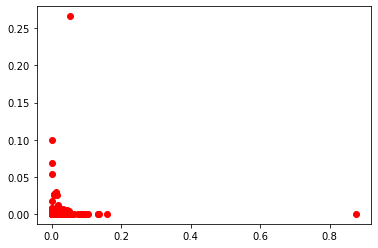

In [17]:
plt.plot(r_norm[:1000], o_norm[:1000], 'ro')
plt.show()

[0.0029476310592144728, 0.6726387143135071, 0.05378509312868118, 0.0016423083143308759, 1.156323378381785e-05]
[0.9970567226409912, 0.5103601217269897, 0.9476357102394104, 0.9983590245246887, 0.9999884366989136]


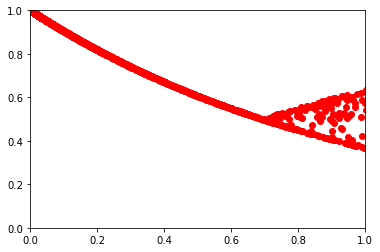

SpearmanrResult(correlation=-0.9313491940564397, pvalue=0.0)


In [38]:
file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/classification_loss/classification_loss_confidence.txt', 'r')
loss = []
conf = []
for string in file.readlines():
    loss += [float(string.split('//')[0])]
    conf += [float(string.split('//')[1])]
print(loss[:5])
print(conf[:5])

loss_rank = np.argsort(loss)
conf_rank = np.argsort(conf)

loss_rank = normalize(loss_rank)
conf_rank = normalize(conf_rank)

import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# plt.plot(loss_rank[:1000], conf_rank[:1000], 'ro')
# plt.plot(loss[:1000], conf[:1000], 'ro')
plt.plot(loss[:10000], conf[:10000], 'ro')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

score = spearmanr(loss[:10000], conf[:10000])
print(score)